## Image Classification Using Deep Learning: A Case Study with Fashion MNIST

**Abstract**
This report presents an image classification model using deep learning techniques applied to the Fashion MNIST dataset. Model accuracy was improved from the initial 76.45% to near 90%. Various data augmentation strategies were explore to enhance model robustness. The architecture, training procedure, and results are discussed in detail.

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

# Data augmentation
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print(tf.__version__)

2.15.0


In [ ]:
from tensorflow import keras

**Dataset Description**
The Fashion MNIST dataset consists of 60,000 training images and 10,000 test images, each of size 28x28 pixels, with corresponding labels ranging from 0 to 9 representing different fashion items.

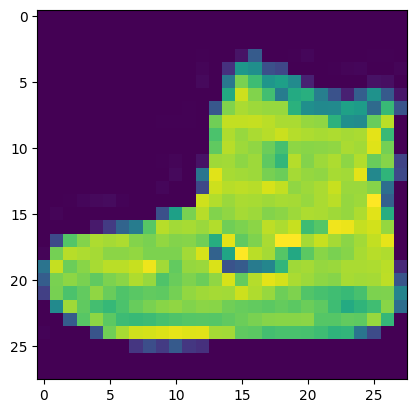

In [ ]:
# import data
data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = data.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.imshow(train_images[0]) #, cmap=plt.cm.binary makes the image black-white

### Model Architecture
A convolutional neural network (CNN) is used for classification. The architecture consists of multiple convolutional layers followed by max-pooling layers and dense layers.

Note, model architecture is from https://www.tensorflow.org/tutorials/keras/classification. It is not the focus of this exercise, thus alternative model structures are not explored.

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),  # input layer
    keras.layers.Dense(128, activation='relu'),  # hidden layer
    keras.layers.Dense(10, activation='softmax')  # output layer, softmax pick values, sums to 1
])

model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])

In [ ]:
# Train the model.
baseline_model = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 16s 8ms/step - loss: 2.7124 - accuracy: 0.6578
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.7645 - accuracy: 0.7157
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6764 - accuracy: 0.7329
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6439 - accuracy: 0.7420
Epoch 5/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.6202 - accuracy: 0.7489


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.6596 - accuracy: 0.7393 - 1s/epoch - 4ms/step

Test accuracy: 0.739300012588501


### Data Preprocessing and Augmentation
Data augmentation techniques are applied to artificially increase the size of the training dataset, which helps in making the model more robust. Techniques such as rotation, zoom, shear, and flip are employed.

In [ ]:
data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = data.load_data()

# Normalize the images to the range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape images to add an extra dimension representing the single color channel
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

**Experiment 1**: Flip images horizontally.

Model accuracy: 88.38%

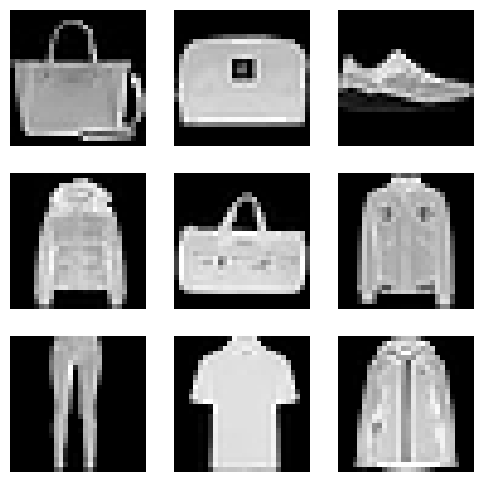

In [ ]:
train_images_hflip, train_labels_hflip, test_images_hflip, test_labels_hflip = train_images, train_labels, test_images, test_labels

# Define data augmentation
datagen_hflip = ImageDataGenerator(horizontal_flip=True)

# Fit the data generator
datagen_hflip.fit(train_images_hflip)

# Display some augmented images
for X_batch, y_batch in datagen_hflip.flow(train_images_hflip, train_labels_hflip, batch_size=9, seed=42):
    plt.figure(figsize=(6, 6))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(X_batch[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.show()
    break

In [ ]:
model_exp_1 = model.fit(train_images_hflip, train_labels_hflip, epochs=5)
test_loss, test_acc = model.evaluate(test_images_hflip, test_labels_hflip, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.6958 - accuracy: 0.7568
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4166 - accuracy: 0.8527
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3814 - accuracy: 0.8649
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3566 - accuracy: 0.8723
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3367 - accuracy: 0.8785
313/313 - 1s - loss: 0.3735 - accuracy: 0.8658 - 1s/epoch - 4ms/step

Test accuracy: 0.8658000230789185


**Experiment 2**: Flip image vertically

Model accuracy: 88.41%.


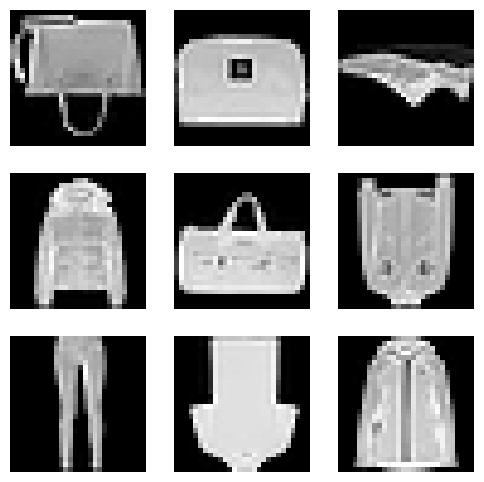

In [ ]:
train_images_vflip, train_labels_vflip, test_images_vflip, test_labels_vflip = train_images, train_labels, test_images, test_labels

# Define data augmentation
datagen_vflip = ImageDataGenerator(vertical_flip=True)

# Fit the data generator
datagen_vflip.fit(train_images_vflip)

# Display some augmented images
for X_batch, y_batch in datagen_vflip.flow(train_images_vflip, train_labels_vflip, batch_size=9, seed=42):
    plt.figure(figsize=(6, 6))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(X_batch[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.show()
    break

In [ ]:
model_exp_2 = model.fit(train_images_vflip, train_labels_vflip, epochs=5)
test_loss, test_acc = model.evaluate(test_images_vflip, test_labels_vflip, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3220 - accuracy: 0.8834
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3089 - accuracy: 0.8866
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2984 - accuracy: 0.8899
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2911 - accuracy: 0.8931
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2795 - accuracy: 0.8970
313/313 - 2s - loss: 0.3584 - accuracy: 0.8743 - 2s/epoch - 6ms/step

Test accuracy: 0.8743000030517578


**Experiment 3**: Calculate Distance (Distance Transformation)

Model accuracy: 81.95%


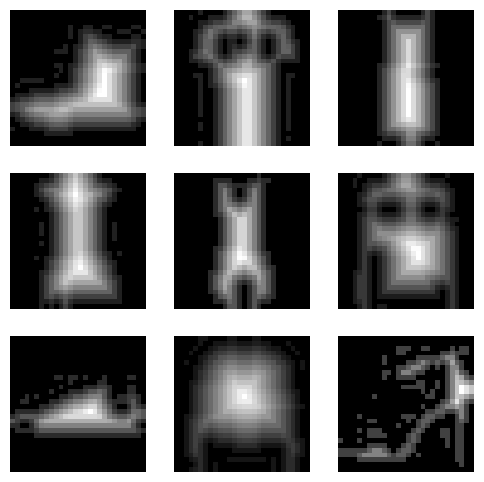

In [ ]:
def distance_transform(images):
    transformed_images = []
    for img in images:
        dist = cv2.distanceTransform((img * 255).astype(np.uint8), cv2.DIST_L2, 3)
        dist = cv2.normalize(dist, dist, 0, 1.0, cv2.NORM_MINMAX)
        transformed_images.append(dist)
    return np.array(transformed_images)

# Apply distance transformation
train_images_distance = distance_transform(train_images[..., 0])
train_images_distance = train_images_distance[..., np.newaxis]
train_labels_distance = train_labels

# Display some transformed images
plt.figure(figsize=(6, 6))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(train_images_distance[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()

In [ ]:
model_exp_3 = model.fit(train_images_distance, train_labels_distance, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4458 - accuracy: 0.8330
Epoch 2/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3838 - accuracy: 0.8568
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3630 - accuracy: 0.8626
Epoch 4/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3491 - accuracy: 0.8687
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3387 - accuracy: 0.8730
313/313 - 1s - loss: 0.6363 - accuracy: 0.8309 - 570ms/epoch - 2ms/step

Test accuracy: 0.8309000134468079


**Experiment 4**: Image Denoise (non-local means denoising)

Model accuracy: 87.66%


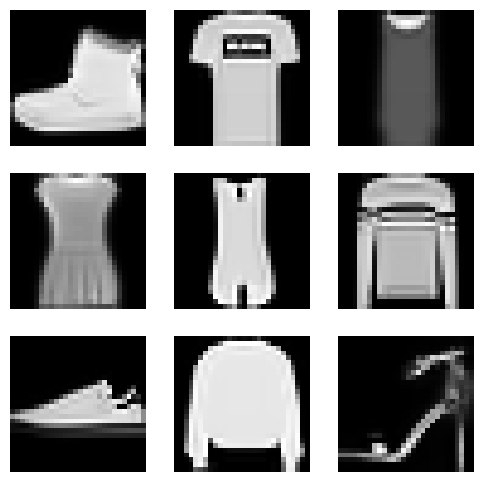

In [15]:
def denoise_images(images):
    denoised_images = []
    for img in images:
        denoised = cv2.fastNlMeansDenoising((img * 255).astype(np.uint8), None, 30, 7, 21)
        denoised_images.append(denoised / 255.0)
    return np.array(denoised_images)

# Apply denoising
train_images_denoised = denoise_images(train_images[..., 0])
train_images_denoised = train_images_denoised[..., np.newaxis]
train_labels_denoised = train_labels

# Display some denoised images
plt.figure(figsize=(6, 6))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(train_images_denoised[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()

In [ ]:
model_exp_4 = model.fit(train_images_denoised, train_labels_denoised, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/5
 944/1875 [==============>...............] - ETA: 4s - loss: 0.4003 - accuracy: 0.8543

**Experiment 5**: Image Denoise (Gaussian)

Conclusion: Improved model performance to 87.95%.


In [ ]:
def apply_gaussian_blur(images, ksize=(5, 5)):
    blurred_images = []
    for img in images:
        blurred = cv2.GaussianBlur((img * 255).astype(np.uint8), ksize, 0)
        blurred_images.append(blurred / 255.0)
    return np.array(blurred_images)

# Apply Gaussian blur
train_images_blurred = apply_gaussian_blur(train_images[..., 0])
train_images_blurred = train_images_blurred[..., np.newaxis]
train_labels_blurred = train_labels

# Display some blurred images
plt.figure(figsize=(6, 6))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(train_images_blurred[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()

In [ ]:
model_exp_5 = model.fit(train_images_blurred, train_labels_blurred, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

**Final result**: Combining all data augmentation techniques

Model accuracy: 89.92%


In [ ]:
train_images_combined = np.concatenate([train_images_hflip, train_images_vflip, train_images_distance, train_images_denoised, train_images_blurred], axis=0)
train_labels_combined = np.concatenate([train_labels_hflip, train_labels_vflip, train_labels, train_labels, train_labels], axis=0)

# Shuffled.
indices = np.random.permutation(len(train_images_combined))
train_images_combined = train_images_combined[indices]
train_labels_combined = train_labels_combined[indices]

In [ ]:
model_combined = model.fit(train_images_combined, train_labels_combined, epochs=5, batch_size=512, validation_split=0.2, verbose=1)
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

### Alternative model structure.

Consider adding drop out layers to reduce overfitting. This section does not yield significant results yet.

In [ ]:
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D

# Explore a different model structure. Add a dropout layer to reduce overfitting.
improved_model = keras.Sequential([
    Flatten(input_shape=(28, 28)),  # Input layer.
    Dense(256, activation='relu'),  # Hidden layer.
    Dropout(0.4),  # Dropout layer
    Dense(128, activation='relu'),  # Hidden layer.
    Dropout(0.3),  # Dropout layer
    Dense(64, activation='relu'),  # Hidden layer.
    Dropout(0.2),  # Dropout layer
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
improved_model.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',  # Use sparse_categorical_crossentropy for integer labels
                       metrics=['accuracy'])

In [ ]:
new_model_combined = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=1)
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

### Resources:
1. https://www.tensorflow.org/tutorials/keras/classification
2. https://www.kaggle.com/code/gpreda/cnn-with-tensorflow-keras-for-fashion-mnist (for alternative model structures).